
<h1 style="text-align: center; background-color:  #003d99; opacity: 0.7; padding: 30px; color: white; border-radius: 8px; border-left: 6px solid red">  Aula 4 - Utilizando Pandas para trabalhar com dados de CTD </h1>
<a id='section_id1'></a>


---

# Índice

[**Aula 4 - Pandas**](#section_id1)
- [1. Pandas](#section_id2)
- [2 Plots](#section_id3)
    - [2.1 Subplots](#section_id4)
    - [2.2 Plot com dois eixos](#section_id6)
    - [2.3 Diagrama TS](#section_id6)


# 1. Pandas

<a id='section_id2'></a>


<div class="alert alert-block alert-success">


<b> Pandas é uma biblioteca que fornece estruturas de dados de alto desempenho e faceis de usar, além de ferramentas de análise se dados para Python. O nome é derivado do termo inglês "panel data"(dados em painel) que remete à uma das principais caracteristicas da biblioteca, a tabulação dos dados em Dataframes que pode ser comparado às matrizes de Numpy Array.
<b>
    </div>

Vamos importar as bibliotecas que já vimos durante o curso

In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()

Utilizaremos o arquivo **rad1_doei002.cnv** para exemplificar a importação de dados .csv utilizando o **Pandas**.

Os nossos arquivos estão em formato de texto com extensão .csv. Para importar os dados utilizaremos a função [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). <mark> Arquivos de texto como CSV e TXT geralmente são importados da mesma forma. 

O dado que vamos trabalhar é um perfil de CTD e convêm avaliar o arquivo rad1_doei002.cnv antes de importar-lo.

In [2]:
dado = pd.read_csv('../dados/rad1_doei002.cnv',
                   names=['prDM','t068C','c0S/m','depSM','sal00','sigma-t','density','svCM','dz/dtM','flag','nbin'],
                   skiprows=72,delim_whitespace= True)

A função possui alguns **argumentos**:

1. Caminho do arquivo
    * '../dados/rad1_doei002.cnv'
2. names
    * Nome de cada uma das colunas na forma de Lista
3. skiprows
    * O arquivo possui um cabeçalho com informações. Para selecionar somente os dado, efetivamente, devemos pular algumas linhas. No caso 72.
4. delim_whitespace
    * Reconhece os espaços em branco entre as colunas de dado.

Após a leitura dos dados temos agora um <b> Dataframe </b>:

In [3]:
dado

,prDM,t068C,c0S/m,depSM,sal00,sigma-t,density,svCM,dz/dtM,flag,nbin
0,2.0,26.2701,5.736224,1.988,37.1592,24.5802,1024.5888,1539.74,0.501,0.0,32.0
1,3.0,26.2719,5.736580,2.982,37.1600,24.5802,1024.5931,1539.76,0.022,0.0,326.0
2,4.0,26.2747,5.736947,3.977,37.1601,24.5794,1024.5966,1539.78,0.536,0.0,48.0
3,5.0,26.2755,5.737059,4.971,37.1600,24.5791,1024.6005,1539.80,0.467,0.0,52.0
4,6.0,26.2747,5.737086,5.965,37.1604,24.5796,1024.6054,1539.82,0.608,0.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...
2527,2529.0,3.2829,3.296963,2499.165,34.9784,27.8413,1039.3490,1505.63,1.806,0.0,12.0
2528,2530.0,3.2815,3.296870,2500.147,34.9783,27.8413,1039.3536,1505.64,1.349,0.0,18.0
2529,2531.0,3.2804,3.296785,2501.129,34.9781,27.8413,1039.3580,1505.66,0.176,0.0,58.0
2530,2532.0,3.2792,3.296732,2502.112,34.9782,27.8415,1039.3628,1505.67,1.355,0.0,15.0


<div class="alert alert-block alert-info">

<b> Um DataFrame é uma estrutura de dados tabulares bidimensionais, com eixos rotulados (linhas e colunas). Pandas DataFrame consiste em três componentes principais, os dados, linhas e colunas. Basicamente, é uma planilha.
    </div>

![texto alternativo](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1524477162/data-frames-in-python-banner_cgzjxy.png)

In [4]:
dado

,prDM,t068C,c0S/m,depSM,sal00,sigma-t,density,svCM,dz/dtM,flag,nbin
0,2.0,26.2701,5.736224,1.988,37.1592,24.5802,1024.5888,1539.74,0.501,0.0,32.0
1,3.0,26.2719,5.736580,2.982,37.1600,24.5802,1024.5931,1539.76,0.022,0.0,326.0
2,4.0,26.2747,5.736947,3.977,37.1601,24.5794,1024.5966,1539.78,0.536,0.0,48.0
3,5.0,26.2755,5.737059,4.971,37.1600,24.5791,1024.6005,1539.80,0.467,0.0,52.0
4,6.0,26.2747,5.737086,5.965,37.1604,24.5796,1024.6054,1539.82,0.608,0.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...
2527,2529.0,3.2829,3.296963,2499.165,34.9784,27.8413,1039.3490,1505.63,1.806,0.0,12.0
2528,2530.0,3.2815,3.296870,2500.147,34.9783,27.8413,1039.3536,1505.64,1.349,0.0,18.0
2529,2531.0,3.2804,3.296785,2501.129,34.9781,27.8413,1039.3580,1505.66,0.176,0.0,58.0
2530,2532.0,3.2792,3.296732,2502.112,34.9782,27.8415,1039.3628,1505.67,1.355,0.0,15.0


Trabalhar com Dataframes nos fornece alguma facilidade em analisar o dado. Começaremos pelo básico.

Ultilizando o método [**info()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), podemos receber informações sobre o nosso dataframe.

In [5]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   prDM     2532 non-null   float64
 1   t068C    2532 non-null   float64
 2   c0S/m    2532 non-null   float64
 3   depSM    2532 non-null   float64
 4   sal00    2532 non-null   float64
 5   sigma-t  2532 non-null   float64
 6   density  2532 non-null   float64
 7   svCM     2532 non-null   float64
 8   dz/dtM   2532 non-null   float64
 9   flag     2532 non-null   float64
 10  nbin     2532 non-null   float64
dtypes: float64(11)
memory usage: 217.7 KB


Para selecionar as colunas de um Dataframe, utilizamos uma sintaxe muito parecida com a manipulação de dicionários, aonde temos as **keys** orientando os objetos.

In [6]:
dado.keys()

Index(['prDM', 't068C', 'c0S/m', 'depSM', 'sal00', 'sigma-t', 'density',
       'svCM', 'dz/dtM', 'flag', 'nbin'],
      dtype='object')

Com o método [.keys()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.keys.html), podemos adquirir as informações dos indices referente às colunas do Dataframe. Dessa forma podemos acessar qualquer uma das séries que compõe o Dataframe. Podemos acessar, portanto, as **séries** de um dataframe a partir das keys.

<div class="alert alert-block alert-success">


<b> Uma Série Pandas é como uma coluna de uma tabela. É uma matriz unidimensional que contém dados de qualquer tipo.
<b>
    </div>

In [7]:
dado['prDM']

0          2.0
1          3.0
2          4.0
3          5.0
4          6.0
         ...  
2527    2529.0
2528    2530.0
2529    2531.0
2530    2532.0
2531    2533.0
Name: prDM, Length: 2532, dtype: float64

Utilizando séries de um dataframe, diversos métodos podem ser aplicados diretamente. Confira a [**documentação**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [8]:
dado['t068C'].max(),dado['t068C'].median(),dado['t068C'].mean()

(26.2755, 4.0764, 6.531926974723545)

Utilizando o método [**.corr**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) no nosso Dataframe, podemos rapidamente criar uma tabela de correlação entre as colunas do dataframe

In [9]:
dado.corr(method='pearson')

,prDM,t068C,c0S/m,depSM,sal00,sigma-t,density,svCM,dz/dtM,flag,nbin
prDM,1.000000,-0.697139,-0.629220,0.999999,-0.319822,0.792689,0.992933,-0.132160,0.011371,NaN,0.017600
t068C,-0.697139,1.000000,0.994950,-0.698021,0.886770,-0.977783,-0.775382,0.800663,-0.057865,NaN,0.048317
c0S/m,-0.629220,0.994950,1.000000,-0.630149,0.927239,-0.961688,-0.715102,0.846863,-0.062447,NaN,0.056878
depSM,0.999999,-0.698021,-0.630149,1.000000,-0.320791,0.793466,0.993087,-0.133398,0.011476,NaN,0.017499
sal00,-0.319822,0.886770,0.927239,-0.320791,1.000000,-0.799154,-0.423537,0.948847,-0.066300,NaN,0.074962
sigma-t,0.792689,-0.977783,-0.961688,0.793466,-0.799154,1.000000,0.859366,-0.682616,0.059693,NaN,-0.047597
density,0.992933,-0.775382,-0.715102,0.993087,-0.423537,0.859366,1.000000,-0.244644,0.021007,NaN,0.005817
svCM,-0.132160,0.800663,0.846863,-0.133398,0.948847,-0.682616,-0.244644,1.000000,-0.066492,NaN,0.075317
dz/dtM,0.011371,-0.057865,-0.062447,0.011476,-0.066300,0.059693,0.021007,-0.066492,1.000000,NaN,-0.683464
flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Não só os métodos estatistícos mas os métodos de [**Plot**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html#pandas.Series.plot) podem ser muito úteis.

<div class="alert alert-block alert-info">

<b> Agora que importamos o dado e temos o dataframe tabulado, podemos acessar cada uma das colunas do nosso dado da seguinte forma:

dado['prDM'] ou dado.prDM-> Acessa a coluna referente a pressão <br>
dado['sal00'] ou dado.sal00-> Acessa a coluna referente a salinidade  <br>
dado['t068C'] ou dado.t068C-> Acessa a coluna referente a temperatura <br>
    </div>


# 2 Plots

<a id='section_id3'></a>


Faremos alguns plots utilizando Pandas e Matplotlib. Relembrando o "caminho" de um plot de linhas da aula passada temos:

Basicamente, podemos construir um gráfico em 3 passos. 

1. Abrir a figura e definir as suas dimensões.
    * plt.figure(figsize=(w,h))
2. O gráfico de linhas é feito usando a função <b>plot</b>
3. Qualquer comando para aprimorar a figura

Text(0.5, 1.0, 'Perfil de Temperatura')

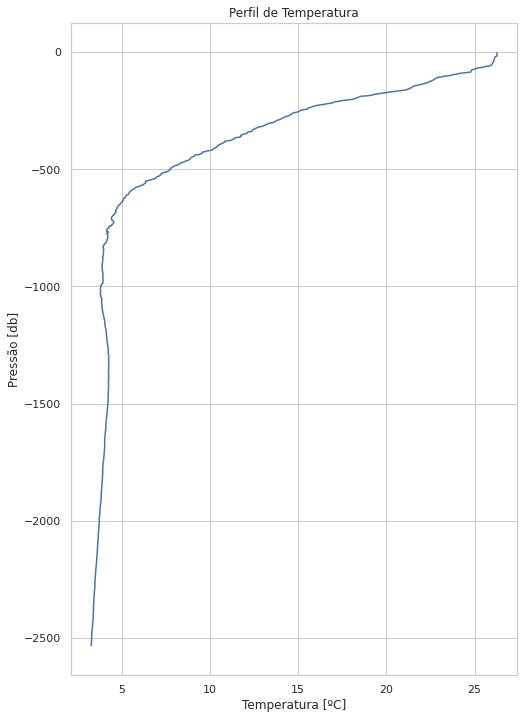

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,12)) #1

plt.plot(dado.t068C,-dado.prDM) # 2 #


plt.xlabel('Temperatura [ºC]') # 3 #
plt.ylabel('Pressão [db]')
plt.title('Perfil de Temperatura')


Podemos fazer gráficos utilizando os métodos disponiveis no Pandas Dataframe.

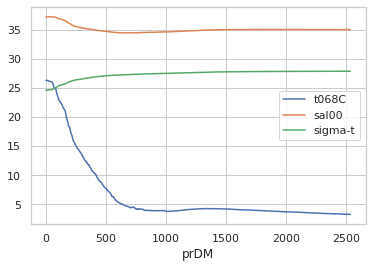

In [11]:
dado.plot(x='prDM', y=['t068C', 'sal00','sigma-t'])

[Confira a documentação para saber quais tipos de plot você pode fazer com o Pandas :)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

# 1.2 Subplots
<a id='section_id4'></a>


Exemplo de subplot com os valores de temperatura e salinidade

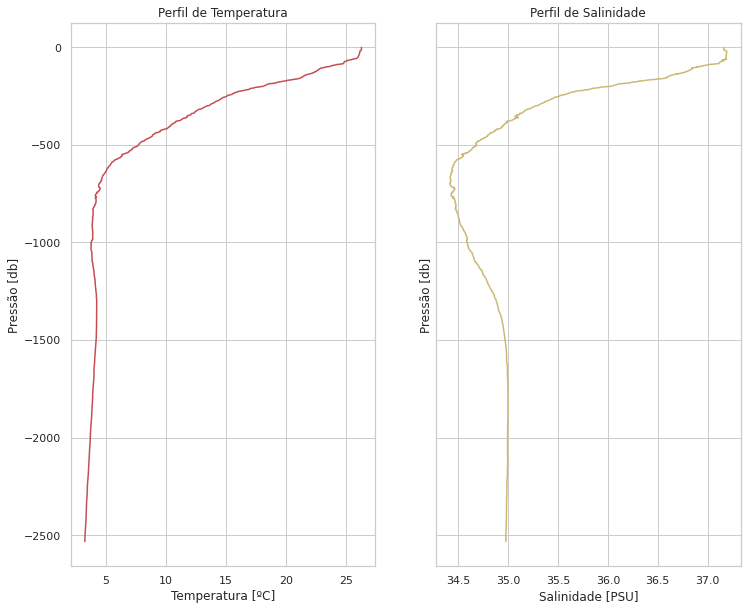

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,10),sharey=True)

# Eixo 1 ou ax1 irá orientar o nosso primeiro gráfico.
ax1.plot(dado.t068C,-dado.prDM,'r') # 2 #
ax1.set_xlabel('Temperatura [ºC]') # 3 #
ax1.set_ylabel('Pressão [db]')
ax1.set_title('Perfil de Temperatura')


ax2.plot(dado['sal00'],-dado.prDM,'y') # 2 #
ax2.set_xlabel('Salinidade [PSU]') # 3 #
ax2.set_ylabel('Pressão [db]')
ax2.set_title('Perfil de Salinidade')

plt.savefig('{0}subplot1.png'.format('../imagens/aula_04/'),
            dpi=150,tight_layout= True) # 4

<div class="alert alert-block alert-danger"> Note que quando estamos trabalhando com os eixos de subplot, algumas funções devem ser executadas de forma diferente.<br> Ex: plt.title() = ax1.set_title()
    </div>

# Plot com 2 eixos
<a id='section_id5'></a>


Podemos utilizar a função subplot e a função [twin()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twiny.html) para criar um eixo "gêmeo" compartilhando o eixo y.

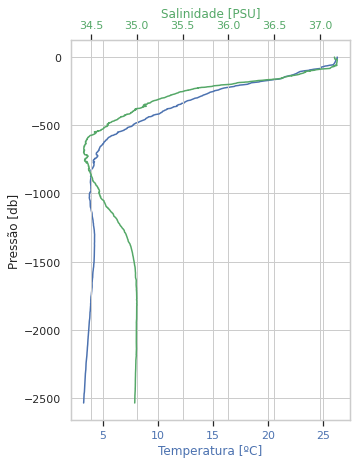

In [13]:
fig, ax1 = plt.subplots(figsize=(5,7))
ax1.set_xlabel('Temperatura [ºC]',color = 'b')
ax1.set_ylabel('Pressão [db]')
ax1.plot(dado.t068C,-dado.prDM,'b') 
ax1.tick_params(axis='x', labelcolor='b')


ax2 = ax1.twiny()  # Inicializando um segundo eixo que vai compartilhar o mesmo a

ax2.set_xlabel('Salinidade [PSU]',color='g') 
ax2.plot(dado['sal00'],-dado.prDM,'g')
ax2.tick_params(axis='x', labelcolor='g')

plt.savefig('{0}twinx_plot.png'.format('../imagens/aula_04/'),
            dpi=150,tight_layout= True) # 4

-------------

# Diagrama TS

<a id='section_id6'></a>


<div class="alert alert-block alert-success">
    
Em oceanografia, diagrama T-S é uma representação gráfica que combina perfis verticais de salinidade e temperatura na coluna de água do oceano, facilitando a identificação de diferentes massas de água. Assim, uma determinada parte da curva do diagrama T-S representa uma determinada massa de água. Em diferentes regiões oceânicas são obtidos diferentes tipos de diagrama T-S, pois a salinidade e a temperatura variam de região para região.

Na oceanografia física, a representação da temperatura em função da salinidade permite estudar massas de água. Ela é uma representação da temperatura potencial (θ) em função da salinidade (S). Isso significa que a temperatura é plotada no eixo das ordenadas (y), enquanto a salinidade é plotada no eixo das abcissas (x). Além disso, um típico diagrama T-S também apresenta curvas de contorno que representam isolinhas de densidade potencial. As massas de água existentes no fundo do oceano são sempre mais densas do que aquelas localizadas na superfície. 
    </div>

Para dar início ao diagrama precisamos fazer um <b>grid</b> com os nossos arrays de <b>temperatura</b> e <b> salinidade</b>. Para isso usamos a função [<b>meshgrid</b>](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) da biblioteca <b>numpy</b>

In [14]:
T,S = np.meshgrid(dado.t068C,dado.sal00)

Exemplo de como funciona a função meshgrid()

![texto alternativo](https://i.stack.imgur.com/8Mbig.png)



Utilizando o dado, agora gridado, utilizamos as matrizes <b>T</b> e <b>S</b> para inferir a densidade. Para o calculo de densidade usamos a função <b>rho</b> da biblioteca [<b>GSW</b>](https://teos-10.github.io/GSW-Python/).

caso nao possua a biblioteca GSW, instale utilizando o seguinte comando. 

Instalando o pacote GSW

<p style="background:black">
<code style="background:black;color:white">pip install GSW
</code>
</p>

In [15]:
import gsw

In [16]:
DENS = gsw.density.rho(S,T,0)

Para fazer o plot da densidade(DENS) utilizaremos a função [contour()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) da biblioteca Matplotlib. Com ela podemos plotar as linhas de contorno.

Agora é só plotar o nosso Diagrama TS;

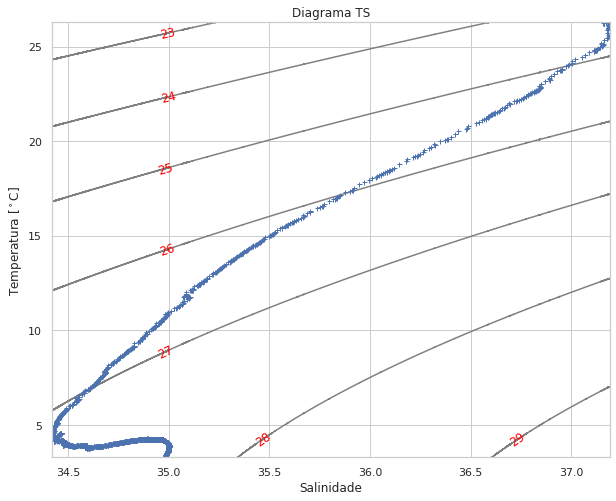

In [17]:
plt.figure(figsize = (10,8)) # 1 

CS = plt.contour(S,T,DENS - 1000,colors = '0.5') # 2
plt.clabel(CS, fontsize=12,fmt='%1.0f',colors='red') # inserindo os valores de densidade nas linhas contornadas


plt.plot(dado.sal00, dado.t068C,'+',color='b',markersize=5) # plotando os pares TS

plt.xlabel('Salinidade') # 3 #
plt.ylabel('Temperatura [$^\circ$C]')
plt.title('Diagrama TS')

plt.savefig('{0}DiagramaTS.png'.format('../imagens/aula_04/'),
            dpi=150,tight_layout= True) # 4

---

<img  style=" width: 75px; height:85%; width: 25%" src="https://raw.githubusercontent.com/calixtops/ES/main/img/logo_OEPY.png">